In [388]:
import pandas as pd

house_data = pd.read_csv("D:\\ML Projects\\House Price Prediction\\Data Set\\archive\\house_prices.csv")
pd.set_option('display.max_columns',None)
house_data.head(5)


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN


In [389]:
house_data.isna().sum()

Index                     0
Title                     0
Description            3023
Amount(in rupees)         0
Price (in rupees)     17665
location                  0
Carpet Area           80673
Status                  615
Floor                  7077
Transaction              83
Furnishing             2897
facing                70233
overlooking           81436
Society              109678
Bathroom                828
Balcony               48935
Car Parking          103357
Ownership             65517
Super Area           107685
Dimensions           187531
Plot Area            187531
dtype: int64

In [390]:
def is_int(x):
    try:
        return int(x)
    except:
        return 

def amount_conversion(x):
    try:
        price = float(x.split(' ')[0])
        value = x.split(' ')[1]

        if value == 'Cr':
            price *= 100
            return int(price)
        else:
            return int(price)
    except:
        return 

def sqft(x):
    try:
        return int(x.split(' ')[0])
    except:
        return

def car(x):
    try:
        return int(x.split(' ')[0])
    except:
        return 
    
def floor(x):
    try:
        first = int(x.split(' ')[0])
        last = int(x.split(' ')[-1])
        return first/last
    except:
        return 


In [391]:
# Data Cleaning
house_data['BHK'] = house_data['Title'].apply(lambda x: x[0])
house_data['BHK'] = house_data['BHK'].apply(is_int)
house_data.BHK.isna().sum()
house_data['BHK'] = house_data['BHK'].dropna(axis = 0)
house_data = house_data[~house_data['BHK'].isna()]
house_data.drop(['Title'],axis=1)
house_data.BHK.isna().sum()

np.int64(0)

In [392]:
house_data['Floor'] = house_data['Floor'].apply(floor)
house_data.dropna(subset=['Floor'],inplace=True)
house_data.Floor.isna().sum()

np.int64(0)

In [393]:
house_data['Amount'] = house_data['Amount(in rupees)'].apply(amount_conversion)
house_data.head()
house_data = house_data[~house_data['Amount'].isna()]
house_data['Amount'].isna().sum()
house_data = house_data.drop(['Amount(in rupees)'],axis=1)

In [394]:
house_data.isna().sum()

Index                     0
Title                     0
Description            1738
Price (in rupees)      6728
location                  0
Carpet Area           65748
Status                  500
Floor                     0
Transaction              58
Furnishing             1233
facing                54899
overlooking           63799
Society               90650
Bathroom                 35
Balcony               35641
Car Parking           85146
Ownership             52595
Super Area            93998
Dimensions           159686
Plot Area            159686
BHK                       0
Amount                    0
dtype: int64

In [395]:
house_data['Area'] = house_data['Carpet Area'].apply(sqft)
house_data = house_data[~house_data['Area'].isna()]
house_data.drop(['Carpet Area'],axis=1)
house_data.isna().sum()

Index                    0
Title                    0
Description            277
Price (in rupees)     6668
location                 0
Carpet Area              0
Status                  64
Floor                    0
Transaction             55
Furnishing              23
facing               16440
overlooking          23024
Society              46479
Bathroom                13
Balcony               4142
Car Parking          38131
Ownership            16023
Super Area           93938
Dimensions           93938
Plot Area            93938
BHK                      0
Amount                   0
Area                     0
dtype: int64

In [396]:
house_data.dropna(subset=['Furnishing','Bathroom'],inplace=True)
house_data['Balcony'] = house_data['Balcony'].fillna(0)
house_data.isna().sum()


Index                    0
Title                    0
Description            277
Price (in rupees)     6663
location                 0
Carpet Area              0
Status                  63
Floor                    0
Transaction             55
Furnishing               0
facing               16426
overlooking          23008
Society              46455
Bathroom                 0
Balcony                  0
Car Parking          38109
Ownership            16007
Super Area           93904
Dimensions           93904
Plot Area            93904
BHK                      0
Amount                   0
Area                     0
dtype: int64

In [397]:
house_data['Car Parking'].unique()
house_data['Car Parking'] = house_data['Car Parking'].apply(car)
house_data['Car Parking'] = house_data['Car Parking'].fillna(0)

In [398]:
# Feature Engineering

useless_features = ['Index','Description','Status','Transaction','facing','overlooking','Society','Ownership','Super Area','Dimensions','Plot Area','Title','Price (in rupees)','Carpet Area']
house_data = house_data.drop(useless_features,axis=1)
house_data.head()

house_data['Price_Per_sqft'] = round((house_data['Amount']*100000/house_data['Area']),2)

(array([1.2400e+03, 3.1000e+02, 3.1200e+02, 1.3030e+03, 6.0230e+03,
        7.4360e+03, 4.2210e+03, 1.2164e+04, 6.5080e+03, 5.6000e+01,
        3.4370e+03, 8.3050e+03, 3.9600e+02, 1.9821e+04, 6.3300e+02,
        1.3050e+03, 1.8200e+02, 1.2000e+01, 1.0000e+02, 1.6300e+02,
        2.0000e+02, 2.8000e+01, 4.8500e+02, 5.1000e+01, 3.8000e+01,
        1.7200e+02, 8.5300e+02, 2.2700e+02, 4.0100e+02, 7.4000e+01,
        6.5000e+01, 2.7810e+03, 5.5200e+02, 5.0000e+02, 2.4970e+03,
        1.5300e+02, 3.6500e+02, 5.9000e+01, 3.2000e+01, 4.9000e+01,
        2.5600e+02, 1.5000e+01, 3.6400e+02, 4.2600e+02, 5.0300e+02,
        3.2000e+01, 3.8000e+01, 9.0000e+00, 1.9400e+02, 9.2100e+02,
        6.3000e+01, 1.0600e+02, 1.4000e+01, 1.1000e+01, 1.3000e+01,
        1.8800e+02, 2.4100e+02, 3.4300e+02, 8.0000e+00, 2.4800e+02,
        5.1000e+01, 6.3000e+02, 1.9000e+01, 2.0000e+01, 2.0900e+02,
        9.0000e+00, 4.5500e+02, 7.7500e+02, 8.8000e+01, 5.3000e+01,
        4.7000e+01, 7.1000e+01, 4.3000e+01, 2.70

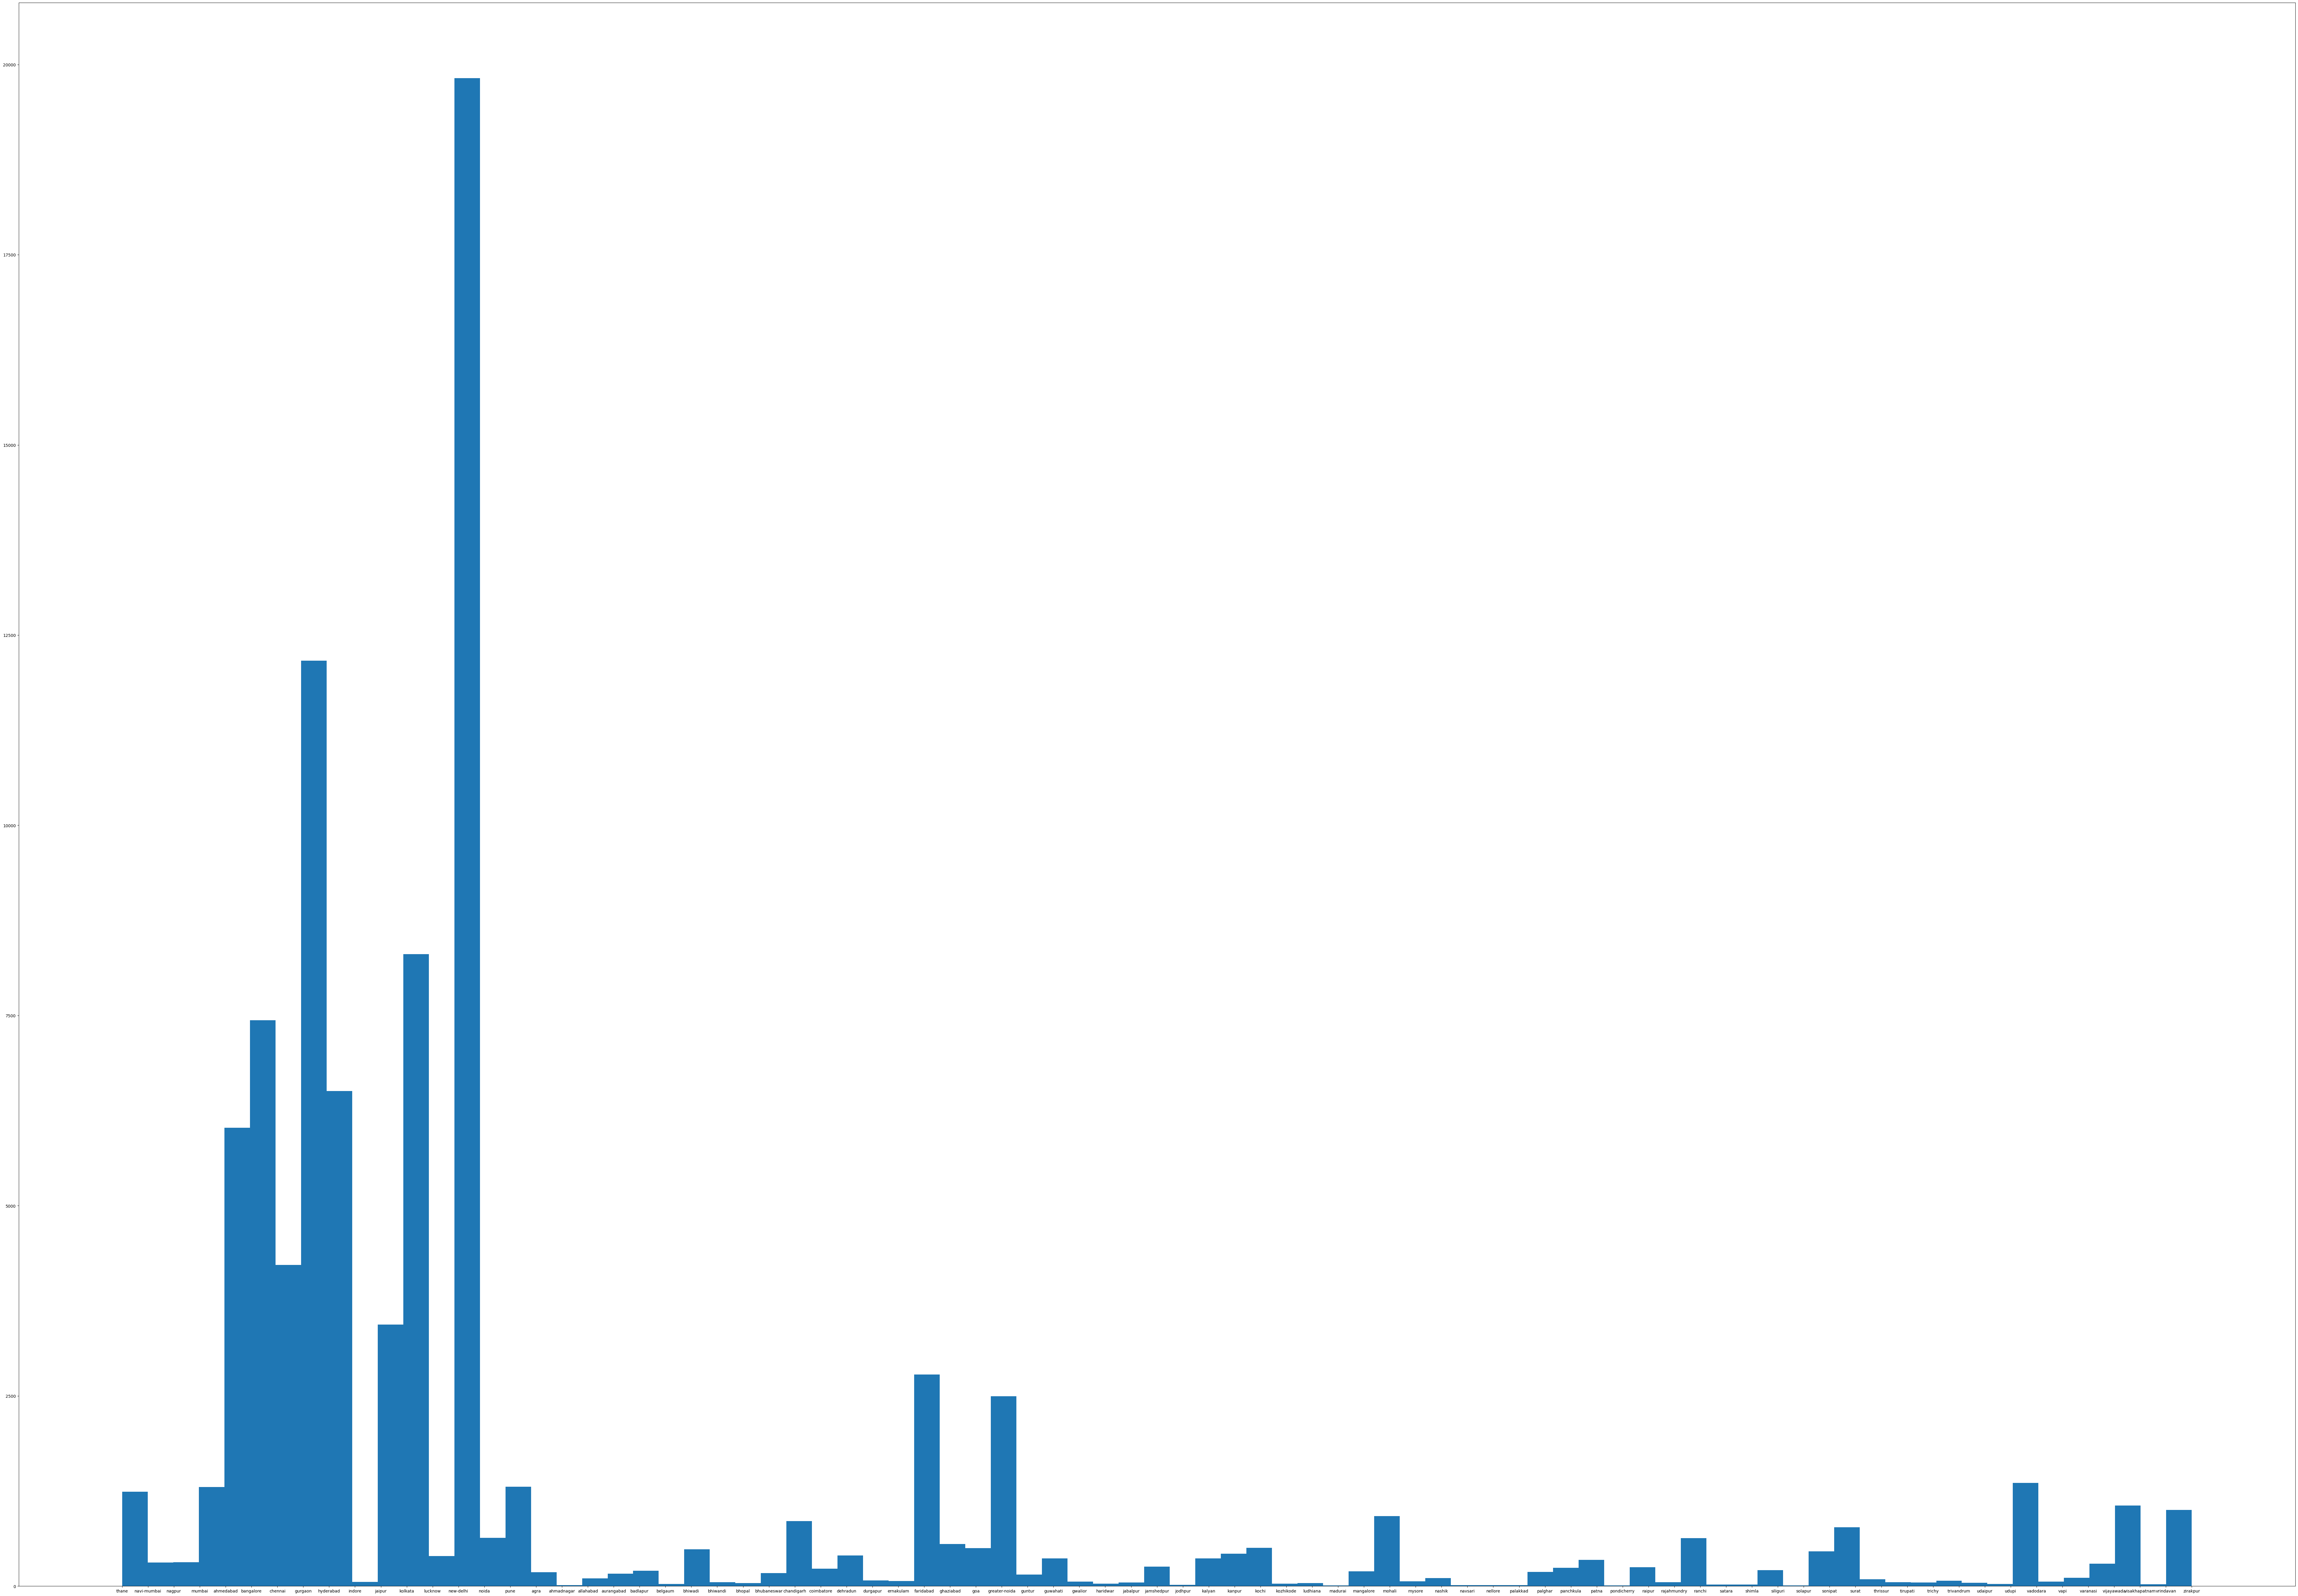

In [399]:
from matplotlib import pyplot as plt
len(house_data.location.unique())
plt.figure(figsize=(100,70))
plt.hist(house_data.location,bins= 81)

In [400]:

location_group = house_data.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_group

house_data['location'] = house_data['location'].apply(lambda x: 'Others' if location_group[x] <50 else x)
house_data['location'].unique()


array(['thane', 'navi-mumbai', 'nagpur', 'mumbai', 'ahmedabad',
       'bangalore', 'chennai', 'gurgaon', 'hyderabad', 'indore', 'jaipur',
       'kolkata', 'lucknow', 'new-delhi', 'noida', 'pune', 'agra',
       'Others', 'allahabad', 'aurangabad', 'badlapur', 'bhiwadi',
       'bhiwandi', 'bhubaneswar', 'chandigarh', 'coimbatore', 'dehradun',
       'durgapur', 'ernakulam', 'faridabad', 'ghaziabad', 'goa',
       'greater-noida', 'guntur', 'guwahati', 'gwalior', 'jamshedpur',
       'kalyan', 'kanpur', 'kochi', 'mangalore', 'mohali', 'mysore',
       'nashik', 'palghar', 'panchkula', 'patna', 'raipur', 'rajahmundry',
       'ranchi', 'siliguri', 'sonipat', 'surat', 'thrissur', 'tirupati',
       'trivandrum', 'vadodara', 'vapi', 'varanasi', 'vijayawada',
       'visakhapatnam', 'zirakpur'], dtype=object)

In [401]:
#One Hot Encoding

furnish_dummy = pd.get_dummies(house_data['Furnishing'])
furnish_dummy
house_data = house_data.drop(['Furnishing'],axis=1)
house_data = pd.concat([house_data,furnish_dummy],axis=1)

location_dummy = pd.get_dummies(house_data['location'])
house_data = house_data.drop(['location'],axis=1)
house_data = pd.concat([house_data,location_dummy],axis=1)
house_data.head()
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93904 entries, 0 to 187528
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Floor           93904 non-null  float64
 1   Bathroom        93904 non-null  object 
 2   Balcony         93904 non-null  object 
 3   Car Parking     93904 non-null  float64
 4   BHK             93904 non-null  float64
 5   Amount          93904 non-null  float64
 6   Area            93904 non-null  float64
 7   Price_Per_sqft  93904 non-null  float64
 8   Furnished       93904 non-null  bool   
 9   Semi-Furnished  93904 non-null  bool   
 10  Unfurnished     93904 non-null  bool   
 11  Others          93904 non-null  bool   
 12  agra            93904 non-null  bool   
 13  ahmedabad       93904 non-null  bool   
 14  allahabad       93904 non-null  bool   
 15  aurangabad      93904 non-null  bool   
 16  badlapur        93904 non-null  bool   
 17  bangalore       93904 non-null  boo

In [402]:
#Outlier Detection

house_data.describe()


,Floor,Car Parking,BHK,Amount,Area,Price_Per_sqft
count,93904.000000,93904.000000,93904.000000,93904.000000,93904.000000,9.390400e+04
mean,0.568747,2.846535,2.700886,138.851242,1246.872977,1.499212e+04
std,0.263469,27.782783,0.792111,529.524010,2805.240293,1.879549e+05
min,0.006667,0.000000,1.000000,1.000000,1.000000,7.090000e+00
25%,0.333333,0.000000,2.000000,50.000000,805.000000,5.555560e+03
50%,0.500000,1.000000,3.000000,84.000000,1080.000000,8.344830e+03
75%,0.750000,1.000000,3.000000,175.000000,1550.000000,1.346154e+04
max,1.000000,999.000000,8.000000,140030.000000,709222.000000,4.000000e+07


In [403]:
IQR_Car = house_data['Car Parking'].quantile(0.75) -  house_data['Car Parking'].quantile(0.25)
car_max_threshold = house_data['Car Parking'].quantile(.75) + 1.5*IQR_Car
car_min_threshold = house_data['Car Parking'].quantile(.25) - 1.5*IQR_Car
house_data = house_data[(house_data['Car Parking'] > car_min_threshold) & (house_data['Car Parking'] < car_max_threshold)]

IQR_BHK = house_data['BHK'].quantile(0.75) -  house_data['BHK'].quantile(0.25)
BHK_max_threshold = house_data['BHK'].quantile(.75) + 1.5*IQR_BHK
BHK_min_threshold = house_data['BHK'].quantile(.25) - 1.5*IQR_BHK
house_data = house_data[(house_data['BHK'] > BHK_min_threshold) & (house_data['BHK'] < BHK_max_threshold)]

IQR_AMT = house_data['Amount'].quantile(0.75) -  house_data['Amount'].quantile(0.25)
AMT_max_threshold = house_data['Amount'].quantile(.75) + 1.5*IQR_AMT
AMT_min_threshold = house_data['Amount'].quantile(.25) - 1.5*IQR_AMT
house_data = house_data[(house_data['Amount'] > AMT_min_threshold) & (house_data['Amount'] < AMT_max_threshold)]

IQR_AREA = house_data['Area'].quantile(0.75) -  house_data['Area'].quantile(0.25)
Area_max_threshold = house_data['Area'].quantile(.75) + 1.5*IQR_AREA
Area_min_threshold = house_data['Area'].quantile(.25) - 1.5*IQR_AREA
house_data = house_data[(house_data['Area'] > Area_min_threshold) & (house_data['Area'] < Area_max_threshold)]

IQR_FLOOR = house_data['Floor'].quantile(0.75) -  house_data['Floor'].quantile(0.25)
PPS_max_threshold = house_data['Floor'].quantile(.75) + 1.5*IQR_FLOOR
PPS_min_threshold = house_data['Floor'].quantile(.25) - 1.5*IQR_FLOOR
house_data = house_data[(house_data['Floor'] > PPS_min_threshold) & (house_data['Floor'] < PPS_max_threshold)]



In [404]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


In [405]:
house_data['Balcony'] = house_data['Balcony'].apply(is_int)
house_data['Bathroom'] = house_data['Bathroom'].apply(is_int)
house_data.dropna(subset=['Balcony'],inplace=True)
X_axis = house_data.drop(['Amount'],axis=1)
target = house_data['Amount']



In [406]:
scaler = StandardScaler()
X_axis = X_axis.drop(['Price_Per_sqft'],axis=1)
scaled_X_Axis = X_axis.copy()
scaled_X_Axis[['Area','Bathroom','Balcony','Car Parking','BHK','Floor']] = scaler.fit_transform(X_axis[['Area','Bathroom','Balcony','Car Parking','BHK','Floor']])
scaled_X_Axis.info()
scaled_X_Axis.head()


<class 'pandas.core.frame.DataFrame'>
Index: 84756 entries, 0 to 187528
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Floor           84756 non-null  float64
 1   Bathroom        84756 non-null  float64
 2   Balcony         84756 non-null  float64
 3   Car Parking     84756 non-null  float64
 4   BHK             84756 non-null  float64
 5   Area            84756 non-null  float64
 6   Furnished       84756 non-null  bool   
 7   Semi-Furnished  84756 non-null  bool   
 8   Unfurnished     84756 non-null  bool   
 9   Others          84756 non-null  bool   
 10  agra            84756 non-null  bool   
 11  ahmedabad       84756 non-null  bool   
 12  allahabad       84756 non-null  bool   
 13  aurangabad      84756 non-null  bool   
 14  badlapur        84756 non-null  bool   
 15  bangalore       84756 non-null  bool   
 16  bhiwadi         84756 non-null  bool   
 17  bhiwandi        84756 non-null  boo

,Floor,Bathroom,Balcony,Car Parking,BHK,Area,Furnished,Semi-Furnished,Unfurnished,Others,agra,ahmedabad,allahabad,aurangabad,badlapur,bangalore,bhiwadi,bhiwandi,bhubaneswar,chandigarh,chennai,coimbatore,dehradun,durgapur,ernakulam,faridabad,ghaziabad,goa,greater-noida,guntur,gurgaon,guwahati,gwalior,hyderabad,indore,jaipur,jamshedpur,kalyan,kanpur,kochi,kolkata,lucknow,mangalore,mohali,mumbai,mysore,nagpur,nashik,navi-mumbai,new-delhi,noida,palghar,panchkula,patna,pune,raipur,rajahmundry,ranchi,siliguri,sonipat,surat,thane,thrissur,tirupati,trivandrum,vadodara,vapi,varanasi,vijayawada,visakhapatnam,zirakpur
0,1.281571,-1.887683,0.024713,-1.015973,-2.243750,-1.162032,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,-1.621860,-0.564753,-1.945698,0.548380,-0.842702,-1.216700,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,-0.838582,-0.564753,-1.945698,0.548380,-0.842702,-0.597133,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,-0.881770,-1.887683,-0.960493,-1.015973,-2.243750,-1.101291,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,-0.345001,-0.564753,-1.945698,0.548380,-0.842702,-0.888694,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [414]:
models = {
            "Linear Rigression" : {
                        'model' : LinearRegression(),
                        'para' : {
                        }
            },
            "Lasso" : {
                        'model' : Lasso(),
                        'para' : {
                                'alpha' : [0.01,0.1,1,5,10],
                                'selection' : ['cyclic', 'random']
                        }
            },

            "Ridge" : {
                        'model' : Ridge(),
                        'para' : {
                                'max_iter' : [1000,5000,15000]
                        }
            },
            "KNN" : {
                        'model' : KNeighborsRegressor(),
                        'para' : {
                                'n_neighbors' : range(1,11)
                        }
            },
            
            "RandomForestRegressor" : {
                        'model' : RandomForestRegressor(),
                        'para' : {
                                'n_estimators': [200,300],
                                'max_depth': [10, 20, None],
                                'min_samples_leaf': [1, 5, 10],
                                'max_features': ['sqrt', 'log2'],
                                'n_jobs' : [True]
                                }

            },
}

In [415]:
for model_name,model in models.items():
    grid = GridSearchCV(estimator=model['model'],param_grid=model['para'],cv=3,n_jobs=True,scoring='r2')
    if model_name == 'RandomForestRegressor':
        grid.fit(X_axis,target)
    else:
        grid.fit(scaled_X_Axis,target)
    
    print(f'model : {model_name}')
    print(f'parameter : {grid.best_params_}')
    print(f'score : {grid.best_score_}')


model : Linear Rigression
parameter : {}
score : 0.4459498903673955
model : Lasso
parameter : {'alpha': 0.01, 'selection': 'random'}
score : 0.449047379658656
model : Ridge
parameter : {'max_iter': 1000}
score : 0.445731456093962
model : KNN
parameter : {'n_neighbors': 9}
score : 0.45812177601454446
model : RandomForestRegressor
parameter : {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300, 'n_jobs': True}
score : 0.567473028786925


In [416]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x_train,x_test,y_train,y_test = train_test_split(X_axis,target,test_size=0.2)
best_model = RandomForestRegressor(n_estimators=300,max_depth=20,min_samples_leaf=1,max_features='sqrt',n_jobs=True)
best_model.fit(x_train,y_train)
best_model.score(x_test,y_test)
score = cross_val_score(best_model,X_axis,target,cv=10).mean()
score

np.float64(0.7405732942688104)

In [417]:
from sklearn.metrics import r2_score

score = r2_score(y_true=y_test,y_pred=best_model.predict(x_test))
score

0.9306426621998231

In [411]:

from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_true=y_test,y_pred=best_model.predict(x_test)))
rmse

np.float64(23.3026312235041)

In [412]:
X_axis.columns

Index(['Floor', 'Bathroom', 'Balcony', 'Car Parking', 'BHK', 'Area',
       'Furnished', 'Semi-Furnished', 'Unfurnished', 'Others', 'agra',
       'ahmedabad', 'allahabad', 'aurangabad', 'badlapur', 'bangalore',
       'bhiwadi', 'bhiwandi', 'bhubaneswar', 'chandigarh', 'chennai',
       'coimbatore', 'dehradun', 'durgapur', 'ernakulam', 'faridabad',
       'ghaziabad', 'goa', 'greater-noida', 'guntur', 'gurgaon', 'guwahati',
       'gwalior', 'hyderabad', 'indore', 'jaipur', 'jamshedpur', 'kalyan',
       'kanpur', 'kochi', 'kolkata', 'lucknow', 'mangalore', 'mohali',
       'mumbai', 'mysore', 'nagpur', 'nashik', 'navi-mumbai', 'new-delhi',
       'noida', 'palghar', 'panchkula', 'patna', 'pune', 'raipur',
       'rajahmundry', 'ranchi', 'siliguri', 'sonipat', 'surat', 'thane',
       'thrissur', 'tirupati', 'trivandrum', 'vadodara', 'vapi', 'varanasi',
       'vijayawada', 'visakhapatnam', 'zirakpur'],
      dtype='object')

In [413]:
import joblib as jb
jb.dump(best_model,"House_Price_Prediction.pkl")
jb.dump(X_axis.columns,'Feature_Name.json')

['Feature_Name.json']